## Logistic Regression to predict employee attrition rate

In [1]:
# import everything
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn import datasets

df = pd.read_csv('general_data.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

We will be analysing the components of the dataset

In [4]:
df.shape

(4382, 24)

there are 4410 rows and 24 columns

In [5]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

Num Companies worked and total working years have null values

In [6]:
#We will be using frequency binning rather than width binning for the age
df['MonthlyIncome'].describe(include='all')

count      4382.000000
mean      65061.702419
std       47142.310175
min       10090.000000
25%       29110.000000
50%       49190.000000
75%       83790.000000
max      199990.000000
Name: MonthlyIncome, dtype: float64

In [7]:
#Copy the dataframe
employeeDetails = df.copy()

employeeDetails.dropna()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1,Y,11,8,0,1,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0,Y,23,8,1,6,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1,Y,15,8,3,5,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3,Y,11,8,3,13,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4,Y,12,8,2,9,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3,Y,13,8,0,28,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2,Y,20,8,1,5,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2,Y,22,8,3,10,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,0,Y,21,8,0,10,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,1,Y,13,8,1,6,2,6,1,5


In [8]:

#Frequency Binning
# Binning by their Age
employeeDetails.loc[df['Age']< 30, 'Age'] = 0
employeeDetails.loc[(df['Age'] >= 30) & (df['Age'] < 36), 'Age'] = 1
employeeDetails.loc[(df['Age'] >= 36) & (df['Age'] < 43), 'Age'] = 2
employeeDetails.loc[df['Age'] >= 43, 'Age'] = 3
# Binning by their Monthly Income
employeeDetails.loc[df['MonthlyIncome']< 29110, 'MonthlyIncome'] = 0
employeeDetails.loc[(df['MonthlyIncome'] >= 29110) & (df['MonthlyIncome'] < 49190), 'MonthlyIncome'] = 1
employeeDetails.loc[(df['MonthlyIncome'] >= 49190) & (df['MonthlyIncome'] < 83800), 'MonthlyIncome'] = 2
employeeDetails.loc[df['MonthlyIncome'] >= 83800, 'MonthlyIncome'] = 3

#Width Binning
#Scaling the data columns 
employeeDetails.loc[df['DistanceFromHome']< 5, 'DistanceFromHome'] = 0
employeeDetails.loc[(df['DistanceFromHome'] >= 5) & (df['DistanceFromHome'] < 10), 'DistanceFromHome'] = 1
employeeDetails.loc[(df['DistanceFromHome'] >= 10) & (df['DistanceFromHome'] < 15), 'DistanceFromHome'] = 2
employeeDetails.loc[(df['DistanceFromHome'] >= 15) & (df['DistanceFromHome'] < 20), 'DistanceFromHome'] = 3
employeeDetails.loc[(df['DistanceFromHome'] >= 20) & (df['DistanceFromHome'] < 25), 'DistanceFromHome'] = 4
employeeDetails.loc[df['DistanceFromHome'] >= 25, 'DistanceFromHome'] = 5

#Scaling the data columns 
employeeDetails.loc[df['NumCompaniesWorked']< 5, 'NumCompaniesWorked'] = 0
employeeDetails.loc[df['NumCompaniesWorked'] >= 5, 'NumCompaniesWorked'] = 1

#Scaling the data columns 
employeeDetails.loc[df['PercentSalaryHike']< 15, 'PercentSalaryHike'] = 0
employeeDetails.loc[(df['PercentSalaryHike'] >= 15) & (df['PercentSalaryHike'] < 20), 'PercentSalaryHike'] = 1
employeeDetails.loc[df['PercentSalaryHike'] >= 20, 'PercentSalaryHike'] = 2

employeeDetails.loc[df['TotalWorkingYears']< 5, 'TotalWorkingYears'] = 0
employeeDetails.loc[(df['TotalWorkingYears'] >= 5) & (df['TotalWorkingYears'] < 10), 'TotalWorkingYears'] = 1
employeeDetails.loc[(df['TotalWorkingYears'] >= 10) & (df['TotalWorkingYears'] < 15), 'TotalWorkingYears'] = 2
employeeDetails.loc[(df['TotalWorkingYears'] >= 15) & (df['TotalWorkingYears'] < 20), 'TotalWorkingYears'] = 3
employeeDetails.loc[(df['TotalWorkingYears'] >= 20) & (df['TotalWorkingYears'] < 25), 'TotalWorkingYears'] = 4
employeeDetails.loc[(df['TotalWorkingYears'] >= 25) & (df['TotalWorkingYears'] < 30), 'TotalWorkingYears'] = 5
employeeDetails.loc[(df['TotalWorkingYears'] >= 30) & (df['TotalWorkingYears'] < 35), 'TotalWorkingYears'] = 6
employeeDetails.loc[(df['TotalWorkingYears'] >= 35) & (df['TotalWorkingYears'] < 40), 'TotalWorkingYears'] = 7
employeeDetails.loc[df['TotalWorkingYears'] >= 40, 'TotalWorkingYears'] = 8

employeeDetails.loc[df['YearsAtCompany']< 5, 'YearsAtCompany'] = 0
employeeDetails.loc[(df['YearsAtCompany'] >= 5) & (df['YearsAtCompany'] < 10), 'YearsAtCompany'] = 1
employeeDetails.loc[(df['YearsAtCompany'] >= 10) & (df['YearsAtCompany'] < 15), 'YearsAtCompany'] = 2
employeeDetails.loc[(df['YearsAtCompany'] >= 15) & (df['YearsAtCompany'] < 20), 'YearsAtCompany'] = 3
employeeDetails.loc[(df['YearsAtCompany'] >= 20) & (df['YearsAtCompany'] < 25), 'YearsAtCompany'] = 4
employeeDetails.loc[(df['YearsAtCompany'] >= 25) & (df['YearsAtCompany'] < 30), 'YearsAtCompany'] = 5
employeeDetails.loc[(df['YearsAtCompany'] >= 35) & (df['YearsAtCompany'] < 40), 'YearsAtCompany'] = 6
employeeDetails.loc[df['YearsAtCompany'] >= 40, 'YearsAtCompany'] = 7

employeeDetails.loc[df['YearsSinceLastPromotion']< 5, 'YearsSinceLastPromotion'] = 0
employeeDetails.loc[(df['YearsSinceLastPromotion'] >= 5) & (df['YearsSinceLastPromotion'] < 10), 'YearsSinceLastPromotion'] = 1
employeeDetails.loc[(df['YearsSinceLastPromotion'] >= 10) & (df['YearsSinceLastPromotion'] < 15), 'YearsSinceLastPromotion'] = 2
employeeDetails.loc[(df['YearsSinceLastPromotion'] >= 15) & (df['YearsSinceLastPromotion'] < 20), 'YearsSinceLastPromotion'] = 3

employeeDetails.loc[df['YearsWithCurrManager']< 5, 'YearsWithCurrManager'] = 0
employeeDetails.loc[(df['YearsWithCurrManager'] >= 5) & (df['YearsWithCurrManager'] < 10), 'YearsWithCurrManager'] = 1
employeeDetails.loc[(df['YearsWithCurrManager'] >= 10) & (df['YearsWithCurrManager'] < 15), 'YearsWithCurrManager'] = 2
employeeDetails.loc[(df['YearsWithCurrManager'] >= 15) & (df['YearsWithCurrManager'] < 20), 'YearsWithCurrManager'] = 3


In [9]:
#Now we map the word variables using categorical encoding

### Data Dictionary

In [10]:
print(df['BusinessTravel'].value_counts())
print(df['Department'].value_counts())
print(df['EducationField'].value_counts())
print(df['Gender'].value_counts())
print(df['JobRole'].value_counts())
print(df['MaritalStatus'].value_counts())

Travel_Rarely        3109
Travel_Frequently     825
Non-Travel            448
Name: BusinessTravel, dtype: int64
Research & Development    2865
Sales                     1330
Human Resources            187
Name: Department, dtype: int64
Life Sciences       1806
Medical             1385
Marketing            475
Technical Degree     392
Other                244
Human Resources       80
Name: EducationField, dtype: int64
Male      2626
Female    1756
Name: Gender, dtype: int64
Sales Executive              975
Research Scientist           872
Laboratory Technician        773
Manufacturing Director       429
Healthcare Representative    389
Manager                      305
Sales Representative         246
Research Director            237
Human Resources              156
Name: JobRole, dtype: int64
Married     2007
Single      1405
Divorced     970
Name: MaritalStatus, dtype: int64


Travel_Rarely        0
Travel_Frequently     1
Non-Travel            2

Research & Development    0
Sales                     1
Human Resources            2

Life Sciences       0
Medical             1
Marketing            2
Technical Degree     3
Other                4
Human Resources       5

Male      0
Female    1

Sales Executive              0
Research Scientist           1
Laboratory Technician        2
Manufacturing Director       3
Healthcare Representative    4
Manager                      5
Sales Representative         6
Research Director            7
Human Resources              8

Married     0
Single      1
Divorced     2


In [11]:
employeeDetailsMap = employeeDetails.copy()
mydict = {
    "No":0,
    "Yes":1,
"Travel_Rarely":0,
"Travel_Frequently":1,
"Non-Travel":2,
"Research & Development":0,
"Sales":1,
"Human Resources":2,
"Life Sciences":0,
"Medical":1,
"Marketing":2,
"Technical Degree":3,
"Other":4,
"Human Resources":5,
"Male":0,
"Female":1,
"Sales Executive":0,
"Research Scientist":1,
"Laboratory Technician":2,
"Manufacturing Director":3,
"Healthcare Representative":4,
"Manager":5,
"Sales Representative":6,
"Research Director":7,
"Human Resources":8,
"Married":0,
"Single":1,
"Divorced":2
}

for i in [1,2,3,6,9,11,12]:
    employeeDetailsMap.iloc[:, i] = employeeDetailsMap.iloc[:, i].map(mydict)

In [12]:
employeeDetailsMap.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,3,0,0,1,1,2,0,1,1,1,...,0,Y,0,8,0,0,6,0,0,0
1,1,1,1,0,2,1,0,1,2,1,...,0,Y,2,8,1,1,3,1,0,0
2,1,0,1,0,3,4,4,1,3,0,...,0,Y,1,8,3,1,2,1,0,0
3,2,0,2,0,0,5,0,1,4,0,...,0,Y,0,8,3,2,5,1,1,1
4,1,0,0,0,2,1,1,1,5,0,...,0,Y,0,8,2,1,2,1,0,0


In [13]:
#Now we will drop the features
employeeDetailsMapDrop = employeeDetailsMap.copy()
employeeDetailsMapDrop = employeeDetailsMapDrop.drop(['EmployeeCount','EmployeeID','Over18','StandardHours'], axis=1)

In [14]:
print(employeeDetailsMapDrop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Data columns (total 20 columns):
Age                        4382 non-null int64
Attrition                  4382 non-null int64
BusinessTravel             4382 non-null int64
Department                 4382 non-null int64
DistanceFromHome           4382 non-null int64
Education                  4382 non-null int64
EducationField             4382 non-null int64
Gender                     4382 non-null int64
JobLevel                   4382 non-null int64
JobRole                    4382 non-null int64
MaritalStatus              4382 non-null int64
MonthlyIncome              4382 non-null int64
NumCompaniesWorked         4382 non-null int64
PercentSalaryHike          4382 non-null int64
StockOptionLevel           4382 non-null int64
TotalWorkingYears          4382 non-null int64
TrainingTimesLastYear      4382 non-null int64
YearsAtCompany             4382 non-null int64
YearsSinceLastPromotion    4382 non-null int64


In [15]:
from pandas.plotting import scatter_matrix
corr = employeeDetailsMapDrop.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1,-0.164128,-0.000372386,-0.0089916,0.00206678,-0.0387486,-0.0144246,0.0363801,-0.013047,-0.0406812,-0.0315301,-0.0145954,0.161198,-0.042352,-0.0258289,0.611578,-0.0381158,0.211592,0.194682,0.205139
Attrition,-0.164128,1,-0.000824797,0.0715171,-0.00435461,-0.0171063,0.0240997,-0.0183964,-0.0123816,-0.0130788,0.010886,-0.0293492,0.0785837,0.0340816,-0.00816403,-0.163668,-0.0475857,-0.0355047,-0.0209302,-0.111212
BusinessTravel,-0.000372386,-0.000824797,1,-0.056973,-0.0263504,-0.00307426,-0.0413255,-0.0389423,-0.0458731,-0.0102626,0.0687354,0.0290524,-0.0186664,0.0409279,-0.00544361,-0.0277287,0.0415376,0.0363794,0.0214783,0.0232646
Department,-0.0089916,0.0715171,-0.056973,1,-0.0256052,0.015366,0.413305,-0.0110686,0.046211,-0.0509801,-0.0296899,-0.0465876,-0.0729333,-0.0119996,0.0171116,-0.0485273,-0.029631,-0.0341632,-0.0266663,-0.0365244
DistanceFromHome,0.00206678,-0.00435461,-0.0263504,-0.0256052,1,-0.00598662,0.011064,0.0445606,-0.0435314,-0.0121815,-0.0299181,-0.00977003,-0.0267678,0.0508893,0.0151667,0.00250435,-0.00850178,0.0423248,0.00355688,0.00963322
Education,-0.0387486,-0.0171063,-0.00307426,0.015366,-0.00598662,1,0.00851504,0.017671,0.0458215,0.0690864,-0.00447787,0.00939955,-0.0189675,-0.0242062,0.00238637,0.00327175,0.00993926,0.0108766,0.0208182,0.00236227
EducationField,-0.0144246,0.0240997,-0.0413255,0.413305,0.011064,0.00851504,1,-0.0256538,0.00487426,-0.000975504,0.00372377,-0.0151016,-0.0123188,-0.024731,0.00804344,-0.0318125,-0.0430833,0.00875936,0.00209828,-0.0232911
Gender,0.0363801,-0.0183964,-0.0389423,-0.0110686,0.0445606,0.017671,-0.0256538,1,0.0260194,0.0214931,-0.0362401,-0.0103322,0.0406749,-0.00912495,-0.0220426,0.0310769,0.032597,0.00537477,0.0306386,0.00240583
JobLevel,-0.013047,-0.0123816,-0.0458731,0.046211,-0.0435314,0.0458215,0.00487426,0.0260194,1,0.0343059,0.00242052,0.0396626,0.0113651,0.0107682,0.000365075,-0.0373235,-0.031931,-0.0348825,-0.0596406,-0.0590463
JobRole,-0.0406812,-0.0130788,-0.0102626,-0.0509801,-0.0121815,0.0690864,-0.000975504,0.0214931,0.0343059,1,0.0183035,-0.0151644,0.0528061,0.00843346,-0.0707578,-0.0114199,-0.0117945,0.0157159,-0.00944337,-0.0526923


From the correlation matrix, we could drop
- business travel
- stock option level
- distance from home

In [16]:
employeeDetailsMapDrop = employeeDetailsMapDrop.drop(['BusinessTravel','DistanceFromHome','DistanceFromHome'], axis=1)

In [17]:
employeeDetailsMapDrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Data columns (total 18 columns):
Age                        4382 non-null int64
Attrition                  4382 non-null int64
Department                 4382 non-null int64
Education                  4382 non-null int64
EducationField             4382 non-null int64
Gender                     4382 non-null int64
JobLevel                   4382 non-null int64
JobRole                    4382 non-null int64
MaritalStatus              4382 non-null int64
MonthlyIncome              4382 non-null int64
NumCompaniesWorked         4382 non-null int64
PercentSalaryHike          4382 non-null int64
StockOptionLevel           4382 non-null int64
TotalWorkingYears          4382 non-null int64
TrainingTimesLastYear      4382 non-null int64
YearsAtCompany             4382 non-null int64
YearsSinceLastPromotion    4382 non-null int64
YearsWithCurrManager       4382 non-null int64
dtypes: int64(18)
memory usage: 616.3 KB


### Train our Model

In [18]:
target = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(employeeDetailsMapDrop.iloc[:,:], employeeDetailsMapDrop['Attrition'], random_state = 42)

In [19]:
X_train_data = X_train.drop('Attrition', axis=1)

target = X_train['Attrition']

X_test_data = X_test.drop('Attrition', axis=1)

y_test_target = X_test['Attrition']

X_train_data.shape, target.shape
X_train_data.head

<bound method NDFrame.head of       Age  Department  Education  EducationField  Gender  JobLevel  JobRole  \
1537    2           1          4               0       0         2        4   
4022    0           8          4               8       0         2        0   
3964    0           1          2               0       0         3        5   
3226    3           0          3               0       0         1        7   
1746    0           1          3               2       0         5        0   
2379    1           0          4               1       0         1        7   
2830    2           1          1               1       0         2        2   
3358    1           8          3               8       0         3        2   
194     1           0          3               1       1         1        2   
1744    3           0          1               0       0         1        2   
2088    0           0          4               0       0         1        3   
4138    0           1 

In [20]:
# we are going to fit our model to the training set

# need to specify multi_class = 'multinomial' and solver
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 42)
logReg.fit(X_train_data, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = logReg.predict(X_test_data)

In [22]:
print(y_pred)

[0 0 0 ... 0 0 0]


### Model Validation

In [23]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test_target, y_pred))

0.8521897810218978


The model shows an accuracy of 85.2%. we want to be able to predict the values

Given a sample employee
Age                        1
Department                 2
Education                  2
EducationField             1
Gender                     0
JobLevel                   1
JobRole                    2
MaritalStatus              1
MonthlyIncome              3
NumCompaniesWorked         2
PercentSalaryHike          2
StockOptionLevel           3
TotalWorkingYears          2
TrainingTimesLastYear      1
YearsAtCompany             2
YearsSinceLastPromotion    1
YearsWithCurrManager       0

In [24]:
# we can use this model to predict any data values
print(logReg.predict([[1,2,2,1,0,1,2,1,3,2,2,3,2,1,2,1,0]]))

[1]


# Clustering

We could also cluster the employees into different segments of employees

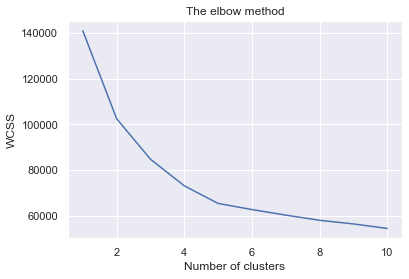

In [25]:
employeeDetailsClustering = employeeDetailsMapDrop.copy()
employeeDetailsClustering.drop('Attrition', axis=1)

#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(employeeDetailsClustering)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

We can assume 5 clusters of employees